<a href="https://colab.research.google.com/github/kmontero3/RedsHackathon/blob/main/RelieverToOpener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

drive.mount('/content/drive')
fangraphs = pd.read_csv('/content/drive/My Drive/RedsHackathon/fangraphs_season_level.csv')
savant = pd.read_csv('/content/drive/My Drive/RedsHackathon/savant_pitch_level.csv')

Mounted at /content/drive


In [ ]:
# Separate the DataFrame into SP and RP and filter for a "qualifying full season"
sp_fangraphs = fangraphs[fangraphs['Role'] == 'SP']
rp_fangraphs = fangraphs[fangraphs['Role'] == 'RP']

# Initialize an empty DataFrame to store the top 150 starting pitchers for each year
top_sp_pitchers = pd.DataFrame()
top_rp_pitchers = pd.DataFrame()

# Iterate through each year (assuming you have data for 2021, 2022, and 2023)
for year in [2021, 2022, 2023]:
    # Filter the data for the current year
    sp_year_data = sp_fangraphs[sp_fangraphs['Season'] == year]
    rp_year_data = rp_fangraphs[rp_fangraphs['Season'] == year]


    # Sort the data by innings pitched in descending order
    sp_year_data = sp_year_data.sort_values(by='IP', ascending=False)
    rp_year_data = rp_year_data.sort_values(by='IP', ascending=False)

    # Select the top 150 starting pitchers for the current year
    top_sp_year = sp_year_data.head(150)
    top_rp_year = rp_year_data.head(250)


    # Append the filtered DataFrame to the 'top_sp_pitchers' DataFrame
    top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
    top_rp_pitchers = top_rp_pitchers.append(top_rp_year)

pitchers = pd.concat([top_sp_pitchers, top_rp_pitchers])

#Ensure Season is an int in both DataFrames
savant['game_date'] = pd.to_datetime(savant['game_date'])
savant['Season'] = savant['game_date'].dt.year.astype(int)
pitchers['Season'] = pitchers['Season'].astype(int)

#Group and calculate 'woba_diff' in 'savant'
savant_grouped = savant.groupby(['pitcher', 'Season', 'stand'])['woba_value'].mean().unstack()
savant_grouped['wOBA_Platoon_split'] = (savant_grouped['L'] - savant_grouped['R']).abs()
savant_grouped = savant_grouped.reset_index()
# Merge the data based on the consistent name and season
pitchers = pitchers.merge(savant_grouped[['pitcher', 'Season', 'wOBA_Platoon_split']], left_on=['MLBAMID', 'Season' ], right_on=['pitcher', 'Season'], how='left')

# Drop the extra 'pitcher' column from the merge if you don't need it
pitchers.drop(columns='pitcher', inplace=True)

#metrics to measure
selected_columns = ['Name', 'MLBAMID', 'tERA', 'FIP', 'xFIP', 'Stuff_plus','BABIP','IP', 'Season', 'Role', 'ERA', 'botCmd', 'Location_plus', 'BB_pct','K_pct',
                    'FA_pct_sc','FC_pct_sc','FS_pct_sc','FO_pct_sc','SI_pct_sc','SL_pct_sc','CU_pct_sc','KC_pct_sc','EP_pct_sc','CH_pct_sc','SC_pct_sc','KN_pct_sc',
                    'wFA_sc','wFC_sc','wFS_sc','wFO_sc','wSI_sc','wSL_sc','wCU_sc','wKC_sc','wEP_sc','wCH_sc','wSC_sc','wKN_sc','wOBA_Platoon_split']

# Now 'pitchers' DataFrame will have the 'woba_diff' column added where the names and seasons match


# Group data by 'Role' and calculate mean for each Role
metrics = ['FStrike_pct', 'LOB_pct', 'ERA', 'K_pct', 'BB_pct', 'AVG', 'WHIP', 'BABIP', 'FIP',
           'xFIP', 'WPA', 'OSwing_pct', 'ZSwing_pct', 'Swing_pct', 'ZContact_pct', 'Zone_pct', 'SwStr_pct',
           'CStr_pct', 'CSW_pct', 'ERA_minus', 'Soft_pct', 'Hard_pct', 'EV', 'LA', 'Barrel_pct', 'HardHit_pct',
           'ZSwing_pct_sc', 'OContact_pct_sc', 'Stuff_plus', 'Location_plus','Pitching_plus','tERA','wOBA_Platoon_split']

grouped_data = pitchers.groupby('Role')[metrics].mean()


avgmetrics = ['Role','IP']
grouped_data_avg = pitchers.groupby('Role')[avgmetrics].mean()
avg_RP_IP = grouped_data_avg.loc['RP', 'IP']
avg_SP_woba_plat_split = grouped_data.loc['SP', 'wOBA_Platoon_split']
avg_SP_location_plus = grouped_data.loc['SP', 'Location_plus']

# Display the average values for each role
print("Average values for each role:")
grouped_data


<ipython-input-2-af6da4946dde>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
<ipython-input-2-af6da4946dde>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_rp_pitchers = top_rp_pitchers.append(top_rp_year)
<ipython-input-2-af6da4946dde>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
<ipython-input-2-af6da4946dde>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_rp_pitchers = top_rp_pitchers.append(top_rp_year)
<ipython-input-2-af6da4946dde>:26: FutureWarning: The frame.append method is deprecated and will be remo

Average values for each role:


<ipython-input-2-af6da4946dde>:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_avg = pitchers.groupby('Role')[avgmetrics].mean()


,FStrike_pct,LOB_pct,ERA,K_pct,BB_pct,AVG,WHIP,BABIP,FIP,xFIP,...,LA,Barrel_pct,HardHit_pct,ZSwing_pct_sc,OContact_pct_sc,Stuff_plus,Location_plus,Pitching_plus,tERA,wOBA_Platoon_split
Role,,,,,,,,,,,,,,,,,,,,,
RP,0.610502,0.742897,3.458258,0.259954,0.089216,0.220970,1.211195,0.282495,3.658568,3.865209,...,12.475032,0.069152,0.369263,0.66081,0.530702,107.757499,99.657047,102.045649,3.767963,0.053698
SP,0.620804,0.734743,4.149350,0.225290,0.075048,0.244199,1.264551,0.289993,4.164233,4.108533,...,12.777354,0.080361,0.390272,0.66088,0.575198,97.713668,101.240000,100.279175,4.404370,0.045317



Metrics with significant differences between roles, ranked by p-value:


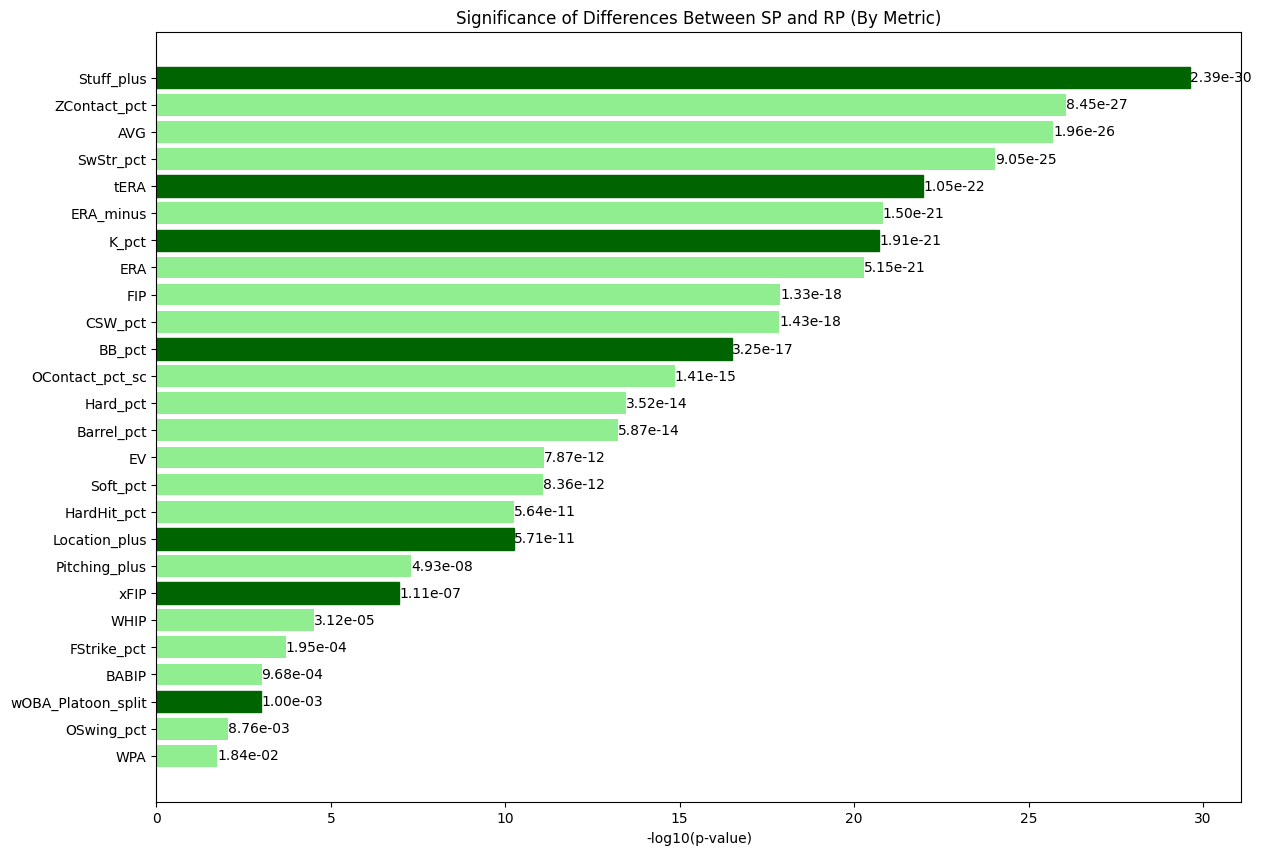

In [ ]:
# Initialize an empty dictionary to hold metrics with significant differences
significant_metrics = {}

# Perform ANOVA test for each Role's Averages
for metric in metrics:
    # Prepare groups for ANOVA
    groups = [group[metric].dropna() for name, group in pitchers.groupby('Role')]
    if len(groups) > 1:
        f_val, p_val = stats.f_oneway(*groups)
        if p_val < 0.05:  # Assuming 0.05 as the threshold for significance
            significant_metrics[metric] = p_val

# Sort metrics by p-value to rank by greatest significant difference
sorted_significant_metrics = sorted(significant_metrics.items(), key=lambda x: x[1])

# Display metrics with significant differences
print("\nMetrics with significant differences between roles, ranked by p-value:")
for metric, p_val in sorted_significant_metrics:
    (f"{metric}: p-value = {p_val}")

# Extract metrics and their corresponding p-values for plotting
metrics, p_values = zip(*sorted_significant_metrics)

# Apply -log10 transformation to the p-values
neg_log_p_values = [-np.log10(p_val) if p_val > 0 else -np.log10(1e-16) for p_val in p_values]

# Define the metrics that you want to highlight
highlighted_metrics = ['Stuff_plus', 'Location_plus', 'K_pct', 'BB_pct', 'xFIP', 'tERA', 'wOBA_Platoon_split']

# Create the horizontal bar chart
plt.figure(figsize=(14, 10))
bars = plt.barh(range(len(metrics)), neg_log_p_values, color='lightgreen')

# Change the color of the bars for the highlight metrics to 'skyblue'
for index, metric in enumerate(metrics):
    if metric in highlighted_metrics:
        bars[index].set_color('darkgreen')

# Add the p-values as text labels on the bars
for bar, p_val in zip(bars, p_values):
    plt.text(
        bar.get_width(),  # X position for text
        bar.get_y() + bar.get_height() / 2,  # Y position for text
        f"{p_val:.2e}",  # Text (formatted p-value)
        va='center',  # Center alignment vertically
        ha='left',  # Left alignment horizontally
    )

# Invert the y-axis to have the largest bar on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('-log10(p-value)')
plt.title('Significance of Differences Between SP and RP (By Metric)')
plt.yticks(range(len(metrics)), metrics)

# Show the plot
plt.show()


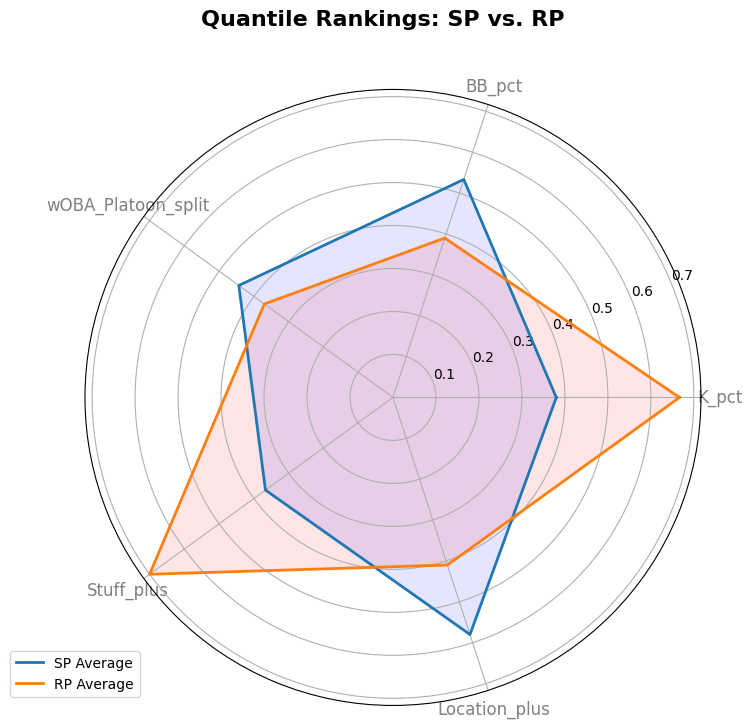

In [ ]:
# Define your statistics columns
stats_columns = ['K_pct', 'BB_pct', 'wOBA_Platoon_split', 'Stuff_plus', 'Location_plus']

# Step 1: Calculate averages for each pitcher for each statistic in a given season
pitcher_averages = pitchers.groupby(['Season', 'Role'])[stats_columns].mean().reset_index()

# Step 2: For each statistic, calculate the quantile of SP and RP averages within the context of all pitchers for the same season
def calculate_quantiles_for_roles(pitcher_averages, season, stats_columns):
    season_data = pitcher_averages[pitcher_averages['Season'] == season]

    # Store quantiles for SPs and RPs
    role_quantiles = {'SP': {}, 'RP': {}}

    for stat in stats_columns:
        # Calculate quantiles for all pitchers for the stat
        all_quantiles = season_data[stat].quantile([0.25, 0.5, 0.75])

        # Calculate the mean for SPs and RPs for the stat
        sp_mean = season_data[season_data['Role'] == 'SP'][stat].mean()
        rp_mean = season_data[season_data['Role'] == 'RP'][stat].mean()

        # Determine the quantile of the SP and RP means within the distribution of all pitchers
        sp_quantile = (season_data[stat] <= sp_mean).mean()
        rp_quantile = (season_data[stat] <= rp_mean).mean()

        # Store the quantiles
        role_quantiles['SP'][stat] = sp_quantile
        role_quantiles['RP'][stat] = rp_quantile

    return role_quantiles
year=2022
role_quantiles = calculate_quantiles_for_roles(pitchers, year, stats_columns)


def create_radar_chart(pitchers, year, stats_columns):
    # First, calculate role quantiles
    role_quantiles = calculate_quantiles_for_roles(pitchers, year, stats_columns)


    # Continue with your existing setup for the radar chart...
    num_vars = len(stats_columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Radar chart setup
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Extract SP, RP quantile values for plotting
    # Invert the values for BB_pct and Platoon_split
    sp_values = [role_quantiles['SP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['SP'][stat] for stat in stats_columns] + [role_quantiles['SP'][stats_columns[0]]]
    rp_values = [role_quantiles['RP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['RP'][stat] for stat in stats_columns] + [role_quantiles['RP'][stats_columns[0]]]


    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], stats_columns, color='grey', size=12)

    # Plot data for SP, RP, and the specific pitcher
    ax.plot(angles, sp_values, linewidth=2, linestyle='solid', label='SP Average')
    ax.fill(angles, sp_values, 'b', alpha=0.1)

    ax.plot(angles, rp_values, linewidth=2, linestyle='solid', label='RP Average')
    ax.fill(angles, rp_values, 'r', alpha=0.1)



    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.suptitle('Quantile Rankings: SP vs. RP', fontsize=16, fontweight='bold')

    plt.show()

# Assuming role_quantiles is a dictionary containing the quantile data for SP and RP
# You will need to provide the role_quantiles dictionary as it's used in the function
# stats_columns lists the statistics you're comparing
stats_columns = ['K_pct', 'BB_pct', 'wOBA_Platoon_split', 'Stuff_plus', 'Location_plus']

# Call the function to create the radar chart
create_radar_chart(pitchers,2022, stats_columns)


In [ ]:
#pitch type percentages
pitch_types = [
    'FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc',
    'SL_pct_sc', 'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc',
    'SC_pct_sc', 'KN_pct_sc', 'UN_pct_sc']

#pitch value attributes
attributes = ['wFA_sc', 'wFC_sc', 'wFS_sc', 'wFO_sc', 'wSI_sc', 'wSL_sc', 'wCU_sc', 'wKC_sc', 'wEP_sc', 'wCH_sc', 'wSC_sc', 'wKN_sc']

# Function to count how many pitch types are used at least 10 % of the time
def count_high_usage_pitch_types(row):
    return sum(row[pitch] >= 0.10 for pitch in pitch_types)

# Function to count the number of pitches with a Value/Runs above Average greater than 2 for a row
def count_attributes_above_two(row):
    return sum(row[attr] > 2 for attr in attributes)

# Function to check if any of the pitcher's throw a specific pitch more than 60% of the time
def has_pitch_type_above_six(row):
    return any(row[pitch] >= 0.6 for pitch in pitch_types)

# Apply functions to each row
pitchers['high_usage_pitch_types'] = pitchers.apply(count_high_usage_pitch_types, axis=1)
pitchers['attributes_above_two'] = pitchers.apply(count_attributes_above_two, axis=1)

# Filter relief pitchers based on if the pitchers have 3 or greater "high value pitches", if they have 3 pitch types with at least 10% usage,
# and if they've thrown at least 40 innings

rp_meeting_criteria = pitchers[(pitchers['Role'] == 'RP') &
                  (pitchers['high_usage_pitch_types'] >= 3) &
                  (pitchers['attributes_above_two'] >= 3) & (pitchers['IP'] >= avg_RP_IP) &
                  ~pitchers.apply(has_pitch_type_above_six, axis=1)]

# Selecting relevant columns
selected_columns = ['Name', 'MLBAMID','Season','IP','Role','ERA','tERA', 'xFIP','BABIP','K_pct','BB_pct', 'Stuff_plus', 'Location_plus', 'wOBA_Platoon_split']

#filter and sort by location_plus
rps_above_avg_location = rp_meeting_criteria[rp_meeting_criteria['Location_plus'] > avg_SP_location_plus]
rp_eligible_ranked_by_location = rps_above_avg_location.sort_values(by=['Location_plus'], ascending=[False])[selected_columns]
rp_eligible_ranked_by_location


,Name,MLBAMID,Season,IP,Role,ERA,tERA,xFIP,BABIP,K_pct,BB_pct,Stuff_plus,Location_plus,wOBA_Platoon_split
808,Hoby Milner,571948,2023,64.1,RP,1.818654,2.768876,3.662312,0.254335,0.2341,0.0516,74.355447,109.063494,0.081184
491,Andrew Kittredge,552640,2021,65.1,RP,1.653062,2.507303,3.004120,0.277108,0.2734,0.0508,118.533595,108.867189,0.028136
473,Raisel Iglesias,628452,2021,70.0,RP,2.571429,3.133430,2.296625,0.287671,0.3773,0.0440,117.289303,108.169532,0.022141
665,Raisel Iglesias,628452,2022,62.0,RP,2.467742,2.803475,2.994765,0.280822,0.3171,0.0569,106.952426,106.278145,0.015964
619,Rafael Montero,606160,2022,68.1,RP,2.370733,2.502329,3.221599,0.260355,0.2704,0.0852,112.976444,106.192484,0.032203
469,Jonathan LoÃ¡isiga,642528,2021,70.2,RP,2.165093,2.351861,3.147335,0.276042,0.2438,0.0565,123.706094,105.970268,0.057383
453,Craig Stammen,489334,2021,80.1,RP,2.800831,3.391095,3.294934,0.247664,0.2453,0.0314,94.477598,105.574020,0.004026
518,Brett Martin,656685,2021,62.1,RP,3.176472,3.814455,3.911496,0.305419,0.1591,0.0530,96.336681,105.491594,0.040434
505,Ryan Pressly,519151,2021,64.0,RP,2.250000,2.025431,2.433585,0.296053,0.3240,0.0520,138.941325,105.156467,0.014732
751,Tyler Holton,663947,2023,84.1,RP,2.134388,3.594652,3.752134,0.212670,0.2274,0.0530,89.344416,103.009306,0.115125


In [ ]:

# Filter all pitchers to have woba_diff less than starting pitchers average woba_diff
pitchers_above_avg_platSplit = pitchers[pitchers['wOBA_Platoon_split'] < avg_SP_woba_plat_split]
pitchers_above_avg_platSplit
daaf = pitchers_above_avg_platSplit[pitchers_above_avg_platSplit['Role'] == 'RP']
daaf

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,wOBA_Platoon_split,high_usage_pitch_types,attributes_above_two
450,15552,643338,Chad Green,Chad Green,R,2021,30,NYY,RP,67,...,NaN,NaN,NaN,NaN,130.076241,105.840642,114.298472,0.006081,2,1
451,17732,622503,Nabil Crismatt,Nabil Crismatt,R,2021,26,SDP,RP,45,...,NaN,NaN,NaN,NaN,93.580449,97.601948,98.422622,0.003140,4,1
453,7274,489334,Craig Stammen,Craig Stammen,R,2021,37,SDP,RP,63,...,NaN,NaN,NaN,NaN,94.477598,105.574020,100.101022,0.004026,3,3
454,14986,606149,Giovanny Gallegos,Giovanny Gallegos,R,2021,29,STL,RP,73,...,NaN,NaN,NaN,NaN,119.421492,101.325385,106.065937,0.012334,2,2
456,4020,433589,Yusmeiro Petit,Yusmeiro Petit,R,2021,36,OAK,RP,78,...,NaN,NaN,NaN,NaN,83.131848,102.230733,96.634169,0.000958,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,13133,571882,Derek Law,Derek Law,R,2023,32,CIN,RP,51,...,NaN,NaN,NaN,NaN,100.522396,100.253527,97.355767,0.001182,5,1
896,11847,455119,Chris Martin,Chris Martin,R,2023,37,BOS,RP,55,...,132.527273,NaN,NaN,NaN,107.800416,114.127878,110.561720,0.033756,4,3
897,12988,605177,Andrew Chafin,Andrew Chafin,L,2023,33,- - -,RP,63,...,NaN,NaN,NaN,NaN,97.398478,95.227948,95.275677,0.011351,3,1
898,13293,543056,Danny Coulombe,Danny Coulombe,L,2023,33,BAL,RP,61,...,NaN,NaN,NaN,NaN,114.531068,95.573786,100.518204,0.008906,4,2


In [ ]:
#function to display pie chart for a pitcher's pitch percentages
# def plot_pitcher_pitch_usage(df, player_name, season):
#     # Filter DataFrame for the specified player and season
#     pitcher_data = fangraphs[(fangraphs['Name'] == player_name) & (fangraphs['Season'] == season)]

#     # Check if pitcher data is empty
#     if pitcher_data.empty:
#         print(f"No data found for {player_name} in {season}.")
#         return

#     # Define the pitch percentage columns and corresponding labels
#     pitch_pct_columns = ['FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc', 'SL_pct_sc',
#                          'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc', 'SC_pct_sc', 'KN_pct_sc']
#     pitch_labels = ['Fastball', 'Cutter', 'Split-Finger', 'Forkball', 'Sinker', 'Slider',
#                     'Curveball', 'Knuckle-Curve', 'Eephus', 'Changeup', 'Screwball', 'Knuckleball']

#     # Select the first row if multiple entries exist for the specified season
#     pitcher_data_row = pitcher_data.iloc[0]

#     # Filter out NaN values and pitches with 0% usage
#     pitch_percentages = [pitcher_data_row[col] for col in pitch_pct_columns if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]
#     filtered_labels = [label for label, col in zip(pitch_labels, pitch_pct_columns) if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]

#     # Plotting
#     if pitch_percentages:  # Check if there's any data to plot
#         plt.figure(figsize=(10, 8))
#         plt.pie(pitch_percentages, labels=filtered_labels,colors=plt.cm.tab10.colors, autopct='%1.1f%%', startangle=140)
#         plt.title(f'Pitch Usage for {player_name}, {season}')
#         plt.show()
#     else:
#         print(f"No pitch usage data available for {player_name} in {season}.")
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'fangraphs' is your DataFrame and 'pitchers' is defined somewhere in your context

def plot_pitcher_pitch_usage(df, player_name, season):
    # Filter DataFrame for the specified player and season
    pitcher_data = df[(df['Name'] == player_name) & (df['Season'] == season)]

    # Check if pitcher data is empty
    if pitcher_data.empty:
        print(f"No data found for {player_name} in {season}.")
        return

    # Define the pitch percentage columns and corresponding labels
    pitch_pct_columns = ['FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc', 'SL_pct_sc',
                         'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc', 'SC_pct_sc', 'KN_pct_sc']
    pitch_labels = ['Fastball', 'Cutter', 'Split-Finger', 'Forkball', 'Sinker', 'Slider',
                    'Curveball', 'Knuckle-Curve', 'Eephus', 'Changeup', 'Screwball', 'Knuckleball']
    grade_prefixes = ['Stf_plus_', 'Loc_plus_', 'Pit_plus_']

    # Select the first row if multiple entries exist for the specified season
    pitcher_data_row = pitcher_data.iloc[0]

    # Filter out NaN values and pitches with 0% usage
    pitch_percentages = [pitcher_data_row[col] for col in pitch_pct_columns if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]
    filtered_labels = [label for label, col in zip(pitch_labels, pitch_pct_columns) if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]

    # Print pitch grades
    for label, pct_col in zip(pitch_labels, pitch_pct_columns):
        if not pd.isna(pitcher_data_row[pct_col]) and pitcher_data_row[pct_col] > 0:
            print(f"\n{label} Grades:")
            for prefix in grade_prefixes:
                grade_col = prefix + pct_col.split('_')[0]  # Construct grade column name
                if grade_col in pitcher_data_row:
                    print(f"{prefix[:-1].replace('_plus', '+')} {label}: {pitcher_data_row[grade_col]}")

    # Plotting
    if pitch_percentages:  # Check if there's any data to plot
        plt.figure(figsize=(10, 8))
        plt.pie(pitch_percentages, labels=filtered_labels, colors=plt.cm.tab10.colors, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pitch Usage for {player_name}, {season}')
        plt.show()
    else:
        print(f"No pitch usage data available for {player_name} in {season}.")






In [ ]:
def get_pitcher_quantile_rankings(pitchers, year, pitcher_name, stats_columns):
    # Filter the DataFrame for the given year
    year_df = pitchers[pitchers['Season'] == year]

    # Extract the specific pitcher's stats for the given year
    pitcher_stats = year_df[year_df['Name'] == pitcher_name]

    if pitcher_stats.empty:
        print(f"No data found for {pitcher_name} in {year}.")
        return None

    # Dictionary to store the quantile rankings
    quantile_rankings = {}

    # Loop through each stat column to calculate the pitcher's quantile ranking
    for stat in stats_columns:
        # All pitchers' stats for the given stat in the year
        all_stats = year_df[stat]

        # The specific pitcher's stat
        pitcher_stat_value = pitcher_stats[stat].iloc[0]

        # Calculate the quantile ranking
        quantile = (all_stats.rank(pct=True)[year_df['Name'] == pitcher_name]).iloc[0]

        # Store the quantile ranking
        quantile_rankings[stat] = quantile

    return quantile_rankings
def create_radar_chart_with_pitcher(pitchers, year, stats_columns, pitcher_name):
    # First, calculate role quantiles
    role_quantiles = calculate_quantiles_for_roles(pitchers, year, stats_columns)

    # Next, get the specific pitcher's quantile rankings
    pitcher_quantiles = get_pitcher_quantile_rankings(pitchers, year, pitcher_name, stats_columns)

    # Continue with your existing setup for the radar chart...
    num_vars = len(stats_columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Radar chart setup
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Extract SP, RP quantile values for plotting
    # Invert the values for BB_pct and Platoon_split
    sp_values = [role_quantiles['SP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['SP'][stat] for stat in stats_columns] + [role_quantiles['SP'][stats_columns[0]]]
    rp_values = [role_quantiles['RP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['RP'][stat] for stat in stats_columns] + [role_quantiles['RP'][stats_columns[0]]]

    # Extract the specific pitcher's quantile rankings for plotting
    # And invert the values for BB_pct and Platoon_split
    pitcher_values = [pitcher_quantiles[stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - pitcher_quantiles[stat] for stat in stats_columns] + [pitcher_quantiles[stats_columns[0]]]

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], stats_columns, color='grey', size=12, weight='bold')

    # Plot data for SP, RP, and the specific pitcher
    ax.plot(angles, sp_values, linewidth=2, linestyle='solid', label='SP Average')
    ax.fill(angles, sp_values, 'b', alpha=0.1)

    ax.plot(angles, rp_values, linewidth=2, linestyle='solid', label='RP Average')
    ax.fill(angles, rp_values, 'r', alpha=0.1)

    ax.plot(angles, pitcher_values, linewidth=2, linestyle='solid', label=pitcher_name)
    ax.fill(angles, pitcher_values, 'green', alpha=0.25)

    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.suptitle(f'Quantile Rankings: {pitcher_name} vs. avg SP and avg RP', fontsize=16, fontweight='bold')
    plt.title(f'represents the percentage of pitchers an {pitcher_name} is better than', fontsize=12)

    plt.show()


Fastball Grades:
Stf+ Fastball: 106.368
Loc+ Fastball: 103.115
Pit+ Fastball: 101.6583333

Sinker Grades:
Stf+ Sinker: 96.81111111
Loc+ Sinker: 103.0380952
Pit+ Sinker: 98.03174603

Slider Grades:
Stf+ Slider: 125.5545098
Loc+ Slider: 104.3031373
Pit+ Slider: 110.1094118

Changeup Grades:
Stf+ Changeup: 96.05106383
Loc+ Changeup: 114.6651064
Pit+ Changeup: 109.6710638


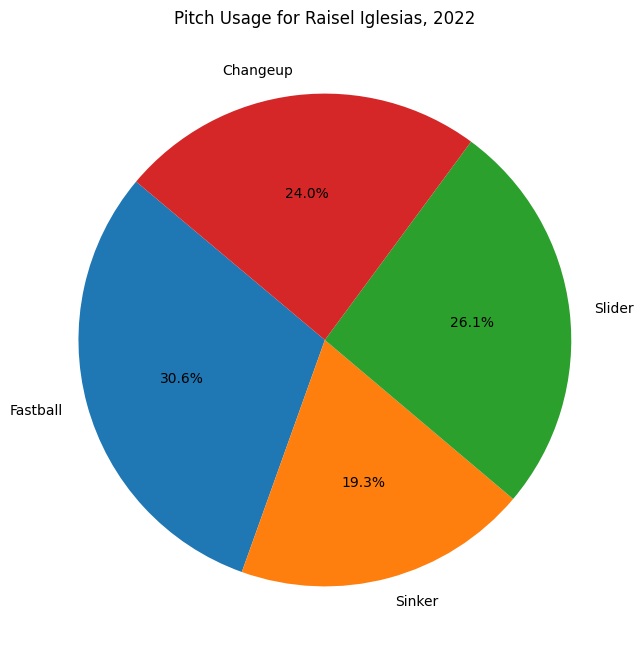

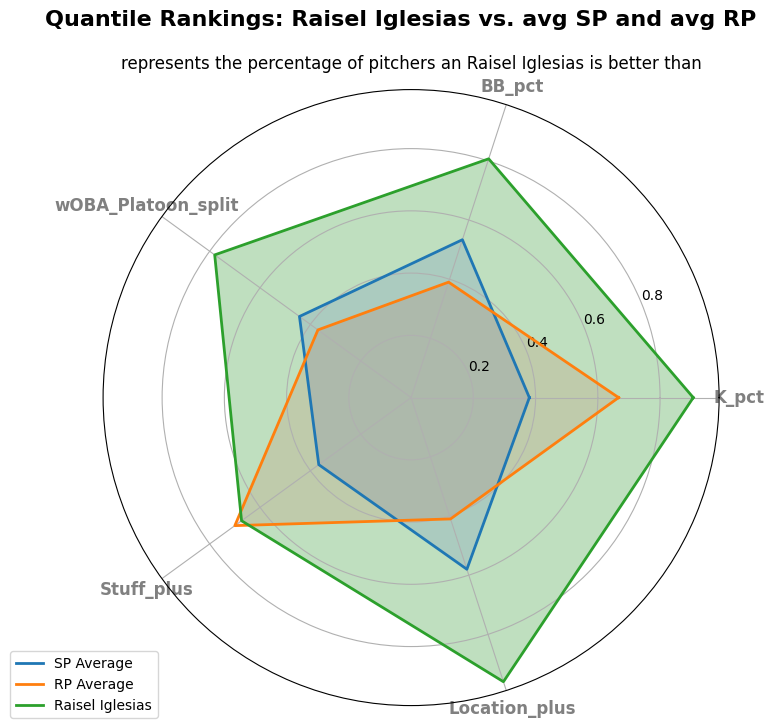

In [73]:
name = 'Raisel Iglesias'
year = 2022
plot_pitcher_pitch_usage(pitchers,name , year)
create_radar_chart_with_pitcher(pitchers, year, stats_columns, name)